<a href="https://colab.research.google.com/github/piccoripico/etc/blob/master/!!(WebUI)Models%2BControlNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title ダウンロードするモデルをチェック→実行→Running on public URL:からアクセス→WebUI起動 { form-width: "20%" }
# https://github.com/camenduru/stable-diffusion-webui-colab
!apt-get -y install -qq aria2
!pip install -q https://github.com/camenduru/stable-diffusion-webui-colab/releases/download/0.0.16/xformers-0.0.16+814314d.d20230118-cp38-cp38-linux_x86_64.whl
!pip install -q --pre triton
# sd-webui-controlnetのためpip：https://self-development.info/automatic1111%E7%89%88web-ui%E3%81%AEcontrolnet/
!pip install opencv-python prettytable

!git clone -b v1.6 https://github.com/camenduru/stable-diffusion-webui
!wget https://raw.githubusercontent.com/camenduru/stable-diffusion-webui-scripts/main/run_n_times.py -O /content/stable-diffusion-webui/scripts/run_n_times.py
!git clone -b v1.6 https://github.com/camenduru/deforum-for-automatic1111-webui /content/stable-diffusion-webui/extensions/deforum-for-automatic1111-webui
!git clone -b v1.6 https://github.com/camenduru/stable-diffusion-webui-images-browser /content/stable-diffusion-webui/extensions/stable-diffusion-webui-images-browser
!git clone -b v1.6 https://github.com/camenduru/stable-diffusion-webui-huggingface /content/stable-diffusion-webui/extensions/stable-diffusion-webui-huggingface
!git clone -b v1.6 https://github.com/camenduru/sd-civitai-browser /content/stable-diffusion-webui/extensions/sd-civitai-browser
!git clone -b v1.6 https://github.com/camenduru/sd-webui-additional-networks /content/stable-diffusion-webui/extensions/sd-webui-additional-networks
!git clone -b v1.6 https://github.com/camenduru/a1111-sd-webui-tagcomplete /content/stable-diffusion-webui/extensions/a1111-sd-webui-tagcomplete
# sd-webui-controlnetもクローン
!git clone https://github.com/Mikubill/sd-webui-controlnet /content/stable-diffusion-webui/extensions/sd-webui-controlnet
# sd-webui-controlnet用のモデル：https://huggingface.co/webui/ControlNet-modules-safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_canny-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_canny-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_depth-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_depth-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_hed-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_hed-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_mlsd-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_mlsd-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_normal-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_normal-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_openpose-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_openpose-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_scribble-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_scribble-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/control_seg-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o control_seg-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/t2iadapter_keypose-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_keypose-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/t2iadapter_seg-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_seg-fp16.safetensors
!aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/webui/ControlNet-modules-safetensors/resolve/main/t2iadapter_sketch-fp16.safetensors -d /content/stable-diffusion-webui/extensions/sd-webui-controlnet/models -o t2iadapter_sketch-fp16.safetensors

%cd /content/stable-diffusion-webui

# ダウンロードするモデルを指定→Promptその他詳細は各ウェブサイト参照
anything_v4 = True #@param {type:"boolean"}
if anything_v4: # https://huggingface.co/andite/anything-v4.0/blob/main/README.md
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/anything-v4.0/resolve/main/anything-v4.0-pruned.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o anything-v4.0-pruned.ckpt
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/anything-v4.0/resolve/main/anything-v4.5-pruned.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o anything-v4.5-pruned.ckpt
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/ckpt/anything-v4.0/resolve/main/anything-v4.0.vae.pt -d /content/stable-diffusion-webui/models/Stable-diffusion -o anything-v4.5-pruned.vae.pt
anything_v3 = False #@param {type:"boolean"}
if anything_v3: # https://huggingface.co/andite/anything-v4.0/blob/main/README.md
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Linaqruf/stolen/resolve/main/pruned-models/anything-v3-3.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o anything-v3.3-pruned.safetensors
pastel_mix = False #@param {type:"boolean"}
if pastel_mix: # https://huggingface.co/andite/pastel-mix/blob/main/README.md
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/andite/pastel-mix/resolve/main/pastelmix.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o pastelmix.safetensors
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/andite/pastel-mix/resolve/main/pastelmix-better-vae.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o pastelmix-better-vae.safetensors
yama_no_susume = False #@param {type:"boolean"}
if yama_no_susume: # https://huggingface.co/alea31415/yama-no-susume/blob/main/README.md / https://huggingface.co/alea31415/aohina-yamanosusume/blob/main/README.md
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/yama-no-susume/resolve/main/yamanosusume18000stepspruned.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o yamanosusume18000stepspruned.ckpt
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/yama-no-susume/resolve/main/yamanosusume40000stepspruned.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o yamanosusume40000stepspruned.ckpt
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/aohina-yamanosusume/resolve/main/yamanosusume2-10500steps.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o yamanosusume2-10500steps.ckpt
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/aohina-yamanosusume/resolve/main/yamanosusume2-15500steps.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o yamanosusume2-15500steps.ckpt
bocchi_the_rock = False #@param {type:"boolean"}
if bocchi_the_rock: # https://huggingface.co/alea31415/bocchi-the-rock-character/blob/main/README.md / https://huggingface.co/alea31415/hutari-bocchi-the-rock/blob/main/README.md
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/bocchi-the-rock-character/resolve/main/bocchitherock24000stepspruned.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o bocchitherock24000stepspruned.ckpt
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/bocchi-the-rock-character/resolve/main/bocchitherock50000stepspruned.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o bocchitherock50000stepspruned.ckpt
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/hutari-bocchi-the-rock/resolve/main/hutari-5000steps.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o hutari-5000steps.ckpt
umamusume = False #@param {type:"boolean"}
if umamusume: # https://huggingface.co/alea31415/umamusume-15characters/blob/main/README.md / https://huggingface.co/alea31415/YuriDiffusion/blob/main/grasswonder-umamusume/README.md
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/umamusume-15characters/resolve/main/umamusume-15-1009-22500steps.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o umamusume-15-1009-22500steps.ckpt
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/umamusume-15characters/resolve/main/umamusume-15-1009-26500steps.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o umamusume-15-1009-26500steps.ckpt
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/YuriDiffusion/resolve/main/grasswonder-umamusume/GrassWonder-7520steps.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o GrassWonder-7520steps.ckpt
onimai = False #@param {type:"boolean"}
if onimai: # https://huggingface.co/alea31415/onimai-characters/blob/main/README.md
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/onimai-characters/resolve/main/onimai0209-ep01-gs22828.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o onimai0209-ep01-gs22828.safetensors
atelier_ryza = False #@param {type:"boolean"}
if atelier_ryza: # https://huggingface.co/alea31415/ryza-atelier-ryza/blob/main/README.md
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/alea31415/ryza-atelier-ryza/resolve/main/rizaDB-54imgs-4500steps.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o rizaDB-54imgs-4500steps.ckpt
deyoyoyo = False #@param {type:"boolean"}
if deyoyoyo: # https://huggingface.co/Deyo/Deyoyoyo
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Deyo/Deyoyoyo/resolve/main/DeyoyoyoV1.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o DeyoyoyoV1.safetensors
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Deyo/Deyoyoyo/resolve/main/Deyoyoyo_3D_V1.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o Deyoyoyo_3D_V1.safetensors
sukiyakimix = False #@param {type:"boolean"}
if sukiyakimix: # https://huggingface.co/Vsukiyaki/SukiyakiMix-v1.0
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/Vsukiyaki/SukiyakiMix-v1.0/resolve/main/SukiyakiMix-v1.0-fp16.safetensors -d /content/stable-diffusion-webui/models/Stable-diffusion -o SukiyakiMix-v1.0-fp16.safetensors
realistic_vision = False #@param {type:"boolean"}
if realistic_vision: # https://civitai.com/models/4201/realistic-vision-v13
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://civitai.com/api/download/models/6987 -d /content/stable-diffusion-webui/models/Stable-diffusion -o realistic_vision_v13.safetensors
ghibli = False #@param {type:"boolean"}
if ghibli: # https://huggingface.co/nitrosocke/Ghibli-Diffusion/blob/main/README.md
    !aria2c --console-log-level=error -c -x 16 -s 16 -k 1M https://huggingface.co/nitrosocke/Ghibli-Diffusion/resolve/main/ghibli-diffusion-v1.ckpt -d /content/stable-diffusion-webui/models/Stable-diffusion -o ghibli-diffusion-v1.ckpt

!sed -i -e '''/prepare_environment()/a\    os.system\(f\"""sed -i -e ''\"s/self.logvar\\[t\\]/self.logvar\\[t.item()\\]/g\"'' /content/stable-diffusion-webui/repositories/stable-diffusion-stability-ai/ldm/models/diffusion/ddpm.py""")''' /content/stable-diffusion-webui/launch.py
!sed -i -e '''/prepare_environment()/a\    os.system\(f\"""sed -i -e ''\"s/dict()))/dict())).cuda()/g\"'' /content/stable-diffusion-webui/repositories/stable-diffusion-stability-ai/ldm/util.py""")''' /content/stable-diffusion-webui/launch.py
!sed -i '$a fastapi==0.90.0' requirements_versions.txt
!python launch.py --share --xformers --enable-insecure-extension-access

（Promptサンプル）

*   (((Love Live! Sakurauchi Riko))), 2 girls eye to eye kiss, unclothed, sexual embarassing face, [[[flowers]]], [[[clear sky]]], blush, masterpiece, best quality, high quality, extremely detailed beautiful face, authentic body
---
（Negative_prompt）

*   worst quality, low quality, medium quality, deleted, lowres, comic, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, jpeg artifacts, signature, watermark, username, blurry

（WebUI設定サンプル）
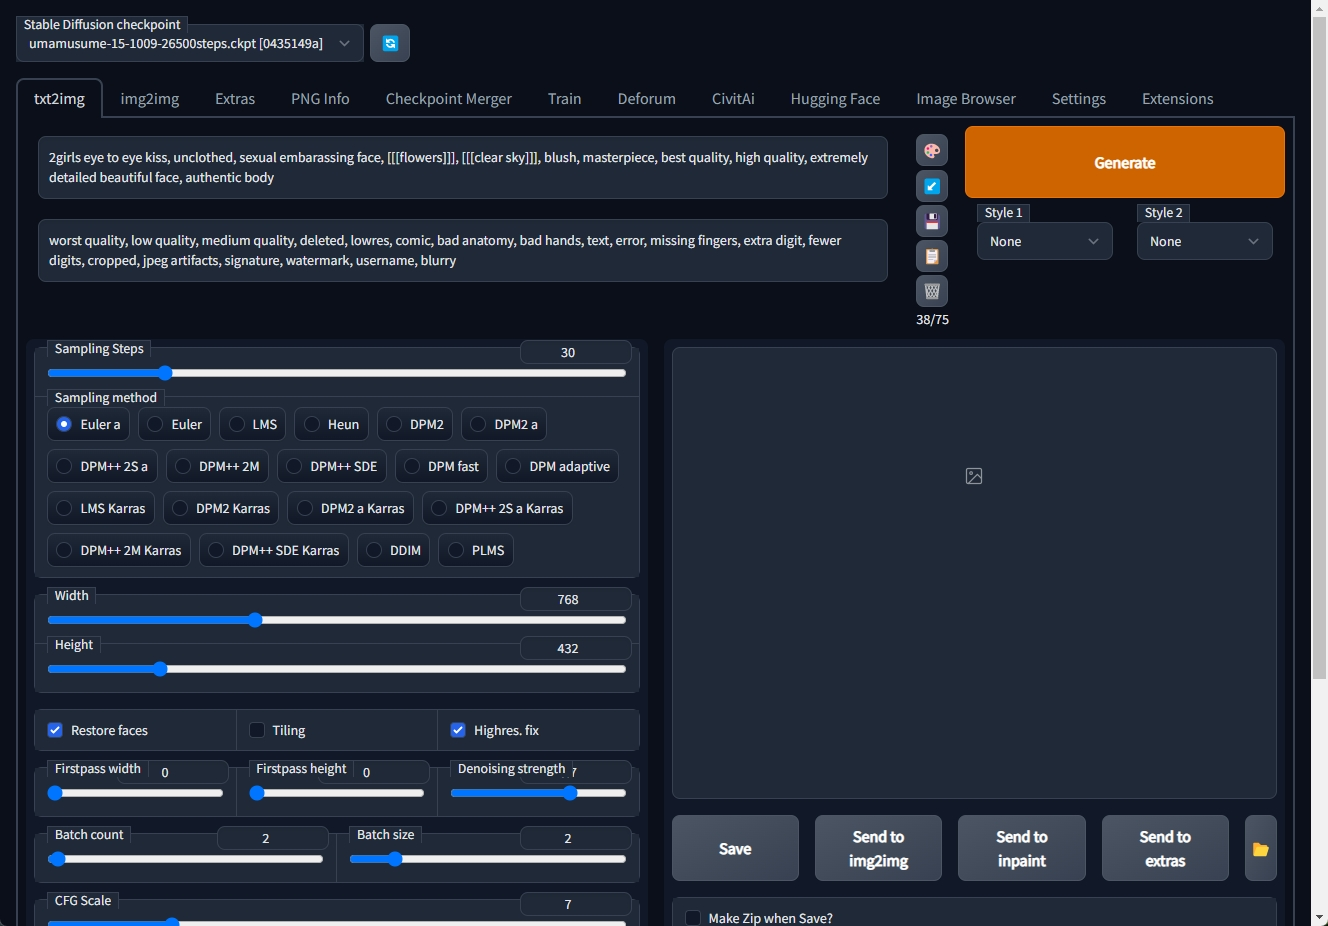

（ControlNet設定サンプル）
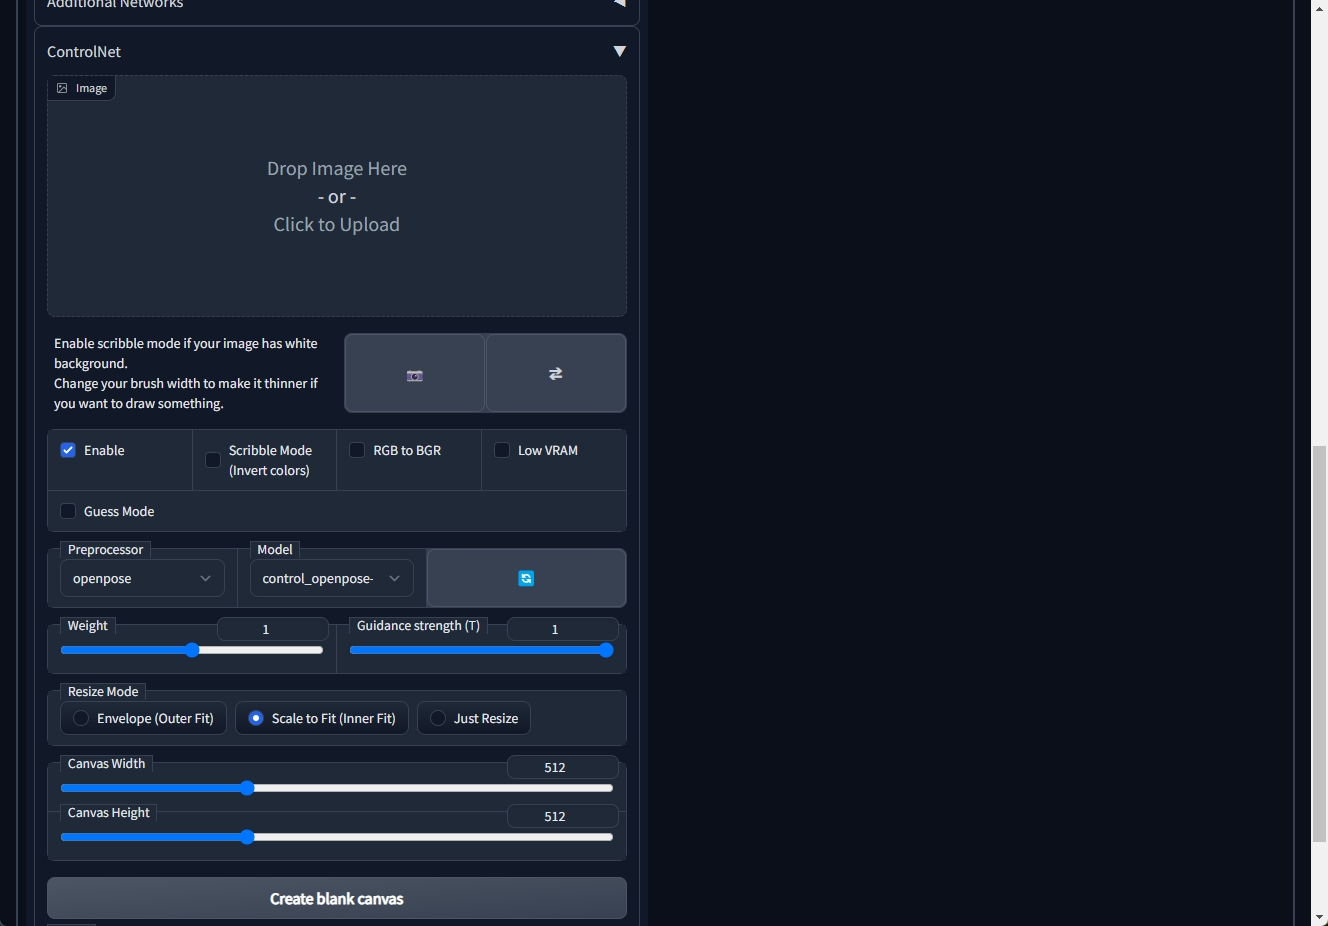

In [ ]:
#@title Zipでダウンロード（WebUIの実行を止めてから）
# https://stackoverflow.com/questions/50453428/how-do-i-download-multiple-files-or-an-entire-folder-from-google-colab
!zip -r /outputs.zip /content/stable-diffusion-webui/outputs
from google.colab import files
files.download("/outputs.zip")